# 학생의 학업 성과
- https://www.kaggle.com/aljarah/xAPI-Edu-Data

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Kaggle API를 통하여 데이터 가져오기

In [ ]:
import ast
with open('kaggle.txt', 'r') as file: # 텍스트 파일에서 딕셔너리 불러오기
    # api = eval(inf.read())
    api = ast.literal_eval(file.read()) # 보안상 권장

In [ ]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = api['username']
os.environ['KAGGLE_KEY'] = api['key']

In [ ]:
!kaggle datasets download aljarah/xAPI-Edu-Data

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 2.16MB/s]


In [ ]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')
# os.makedirs('./zip')

In [ ]:
from glob import glob
glob('*')

['zip', 'xAPI-Edu-Data.zip', 'kaggle.txt', 'sample_data']

In [ ]:
from glob import glob
glob('*.zip')

['xAPI-Edu-Data.zip']

In [ ]:
import zipfile
fantasy_zip = zipfile.ZipFile(glob('*.zip')[0])
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip') # 압축해제

'zip/xAPI-Edu-Data.csv'

In [ ]:
df = pd.read_csv('./zip/xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## EDA
- 데이터셋 설명

    1 성별 - 학생의 성별(명목: '남성' 또는 '여성')

    2 국적 - 학생의 국적(명목:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','
    베네수엘라','이란','튀니스','모로코','시리아 ',' 팔레스타인', '이라크', '리비아')

    3 출생지 - 학생의 출생지(명칭:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','
    베네수엘라','이란','튀니스','모로코 ','시리아','팔레스타인','이라크','리비아')

    4 교육 단계 - 교육 수준 학생이 속한 (명목: '하위', '중학교', '고등학교')

    5 학년 수준 - 학년 학생이 속한 (명목: 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07 ', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

    6 섹션 ID - 학급 학생이 속한(명칭:'A','B','C')

    7 주제-과정 주제(명목:'영어','스페인어', '프랑스어','아랍어','IT','수학','화학', '생물학', '과학','역사',' 꾸란 ',' 지질학')

    8 학기 - 학년도 학기(명목:'첫 번째','두 번째')

    9 학생을 책임지는 학부모(명칭: '엄마', '아빠')

    10 들린 손 - 학생이 교실에서 손을 든 횟수(숫자:0-100)

    11 방문한 리소스 - 학생이 코스 콘텐츠를 방문한 횟수(숫자:0-100)

    12 공지사항 보기-학생이 새 공지사항을 확인하는 횟수(숫자:0-100)

    13 토론 그룹 - 학생이 토론 그룹에 참여하는 횟수(숫자:0-100)

    14 학부모 응답 설문조사 - 학부모가 학교에서 제공한 설문조사에 응답했는지 여부
    (명목: '예', '아니오')

    15 학부모 학교 만족도 - 학부모의 학교 만족도(명목:'예','아니오')

    16 결석일수-학생별 결석일수(명목 : 7세 이상, 7세 미만)

- class가 3개이기 때문에 다중분류(멀티레이블)
    - 학생들은 총 성적/점수에 따라 세 가지 숫자 간격으로 분류됩니다.
    - 저수준: 간격에는 0에서 69 사이의 값이 포함됩니다.

    - 중간 수준: 간격에는 70에서 89 사이의 값이 포함됩니다.

    - 상위 수준: 간격에는 90-100 사이의 값이 포함됩니다.

In [ ]:
print(df.shape)
print(df.info())

(480, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSati

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df[df['raisedhands']==100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
95,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,100,80,2,70,No,Bad,Under-7,H
138,F,Jordan,Egypt,MiddleSchool,G-07,A,Quran,F,Mum,100,80,95,90,No,Bad,Under-7,H
139,M,Jordan,USA,MiddleSchool,G-07,A,Quran,F,Mum,100,85,85,70,No,Bad,Under-7,M
146,F,lebanon,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Good,Under-7,H
149,F,Jordan,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Bad,Under-7,H
152,F,SaudiArabia,USA,HighSchool,G-11,B,Science,S,Father,100,91,98,40,Yes,Bad,Under-7,H


In [ ]:
# countList = [x for x in df.columns if df[x].dtype=='object']  # 범주형 자료형에 해당하는 변수의 특징(object)을 사용하여 작성할 수도 있음.
countList = ['gender',	'NationalITy',	'PlaceofBirth']

for x in countList:
    print(f'{x}----------------------------')
    print(df[x].value_counts())

gender----------------------------
M    305
F    175
Name: gender, dtype: int64
NationalITy----------------------------
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
PlaceofBirth----------------------------
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64


------------raisedhands---------------


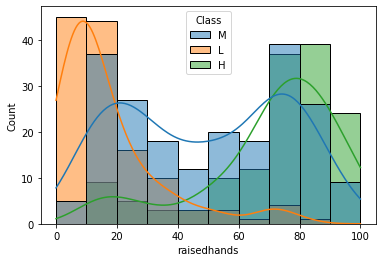

------------VisITedResources---------------


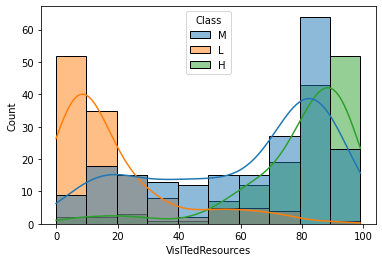

------------AnnouncementsView---------------


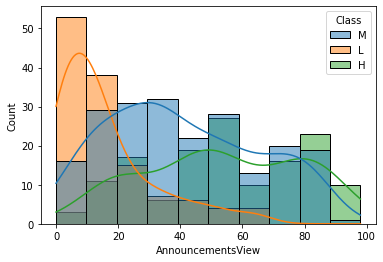

------------Discussion---------------


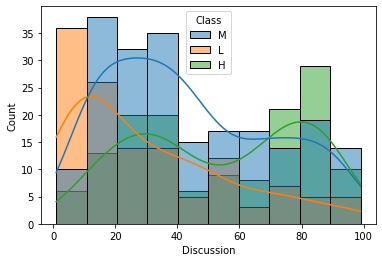

In [ ]:
# 데이터 컬럼중에 수치형 데이터를 확인하고 자동으로 그 컬럼을 히스토그램을 그리기
histList = [x for x in df.columns if df[x].dtype=='int']

for i in histList:
    print(f'------------{i}---------------')
    sns.histplot(x=i, hue='Class', data=df, kde=True)
    plt.show()

raisedhands----------------------------


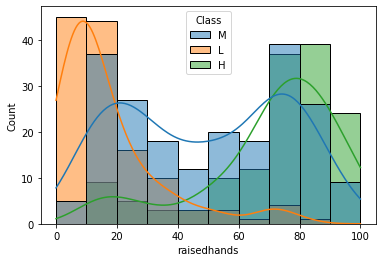

VisITedResources----------------------------


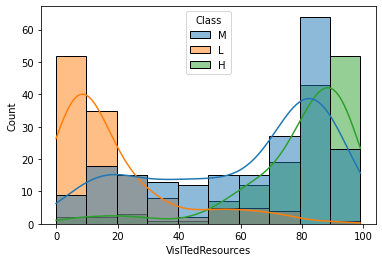

Discussion----------------------------


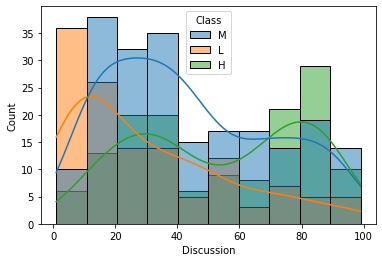

In [ ]:
histList = ['raisedhands', 'VisITedResources',	'Discussion']

for x in histList:
    print(f'{x}----------------------------')
    sns.histplot(x=x, data=df, hue='Class', kde=True) # kde=True: class의 분포를 곡선 그래프로 나타냄
    plt.show()

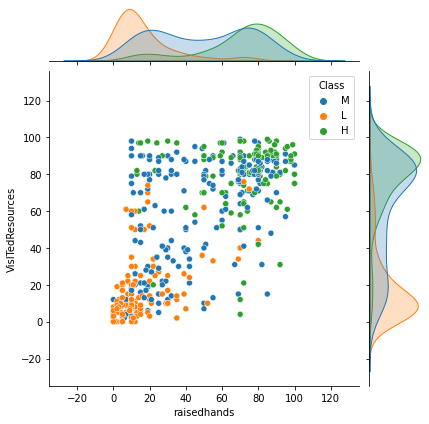

In [ ]:
# 시각화(joinplot, class 단위로 손든 횟수와 공지사항을 본 횟수 간의 상관도 차트 작성)
sns.jointplot(x='raisedhands', y='VisITedResources', data=df, hue='Class')
plt.show()

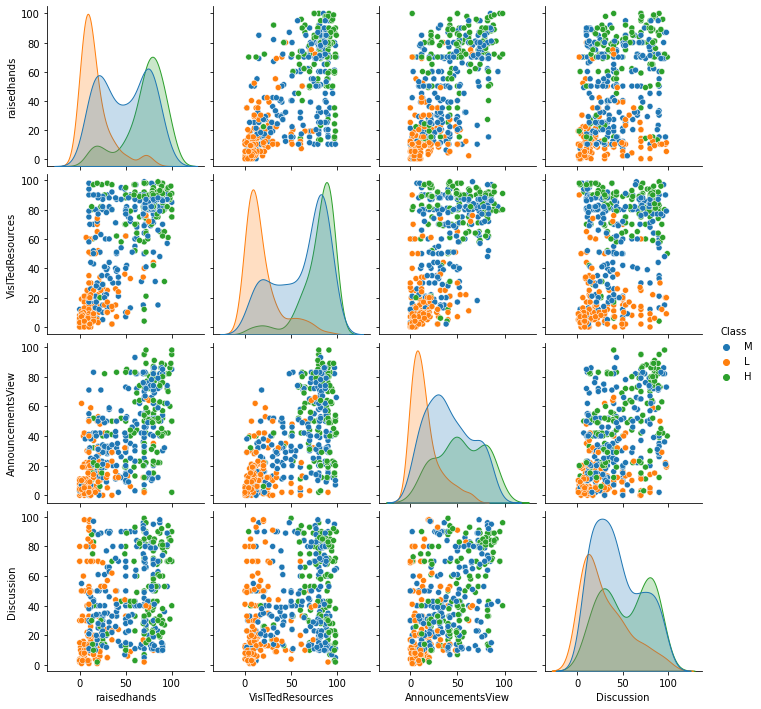

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

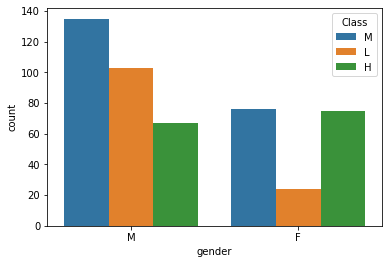

In [ ]:
sns.countplot(x='gender', hue='Class', data=df)
plt.show()

----------gender--------------


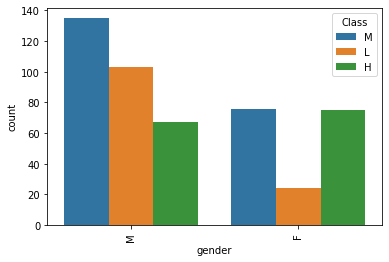

----------NationalITy--------------


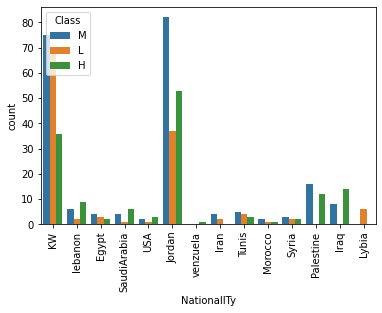

----------PlaceofBirth--------------


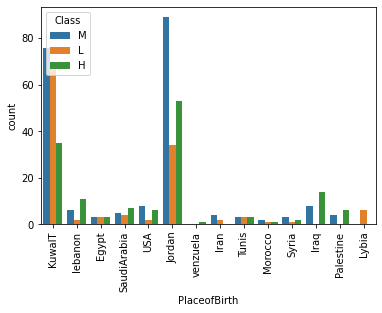

----------ParentAnsweringSurvey--------------


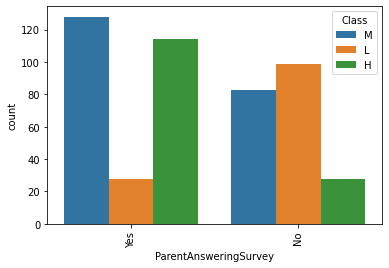

----------ParentschoolSatisfaction--------------


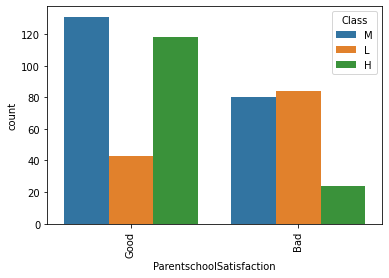

----------Topic--------------


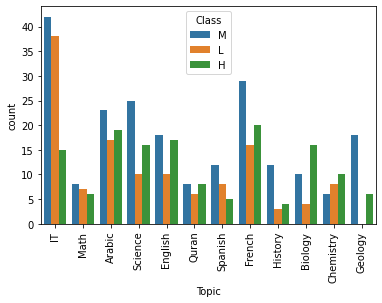

In [ ]:
countList = ['gender',	'NationalITy',	'PlaceofBirth', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Topic']

for i in countList:
    print(f'----------{i}--------------')
    sns.countplot(x=i, hue='Class', data=df)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# 범주형 자료값들을 변환
# y값은 class L,M,H로 되어 있음. 레벨인코딩을 진행하면 알파벳 순으로 1, 2, 0으로 됨

df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1)) # 사용자가 임의로 지정

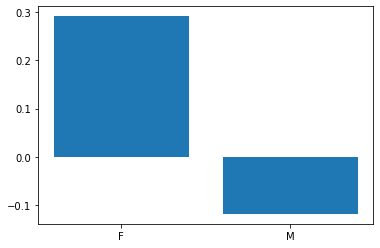

In [ ]:
tmp = df.groupby('gender').mean()['Class_value']
plt.bar(tmp.index, tmp)
plt.show()

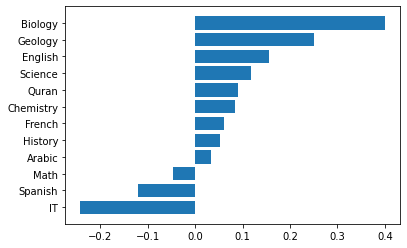

In [ ]:
tmp = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(tmp.index, tmp)
plt.show()

## 분석에 사용할 속성을 선택

In [ ]:
# x값도 변환해야 함
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)
y = df['Class']

## 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 훈련, 테스트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=222)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 59), (144, 59), (336,), (144,))

## 모델 학습/평가
- 로지스틱회귀
- XGboost

In [ ]:
# 분류모델
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 리포트 출력
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.63      0.79      0.70        34
           L       0.88      0.82      0.85        45
           M       0.75      0.68      0.71        65

    accuracy                           0.75       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.76      0.75      0.75       144



In [ ]:
# 혼돈 행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[27,  0,  7],
       [ 0, 37,  8],
       [16,  5, 44]])

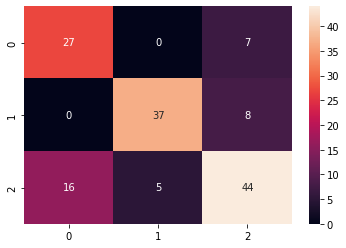

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# XGboost 모델 생성
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.64      0.88      0.74        34
           L       0.91      0.87      0.89        45
           M       0.83      0.69      0.76        65

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.79       144
weighted avg       0.81      0.79      0.79       144



(3, 59)
(336, 59)


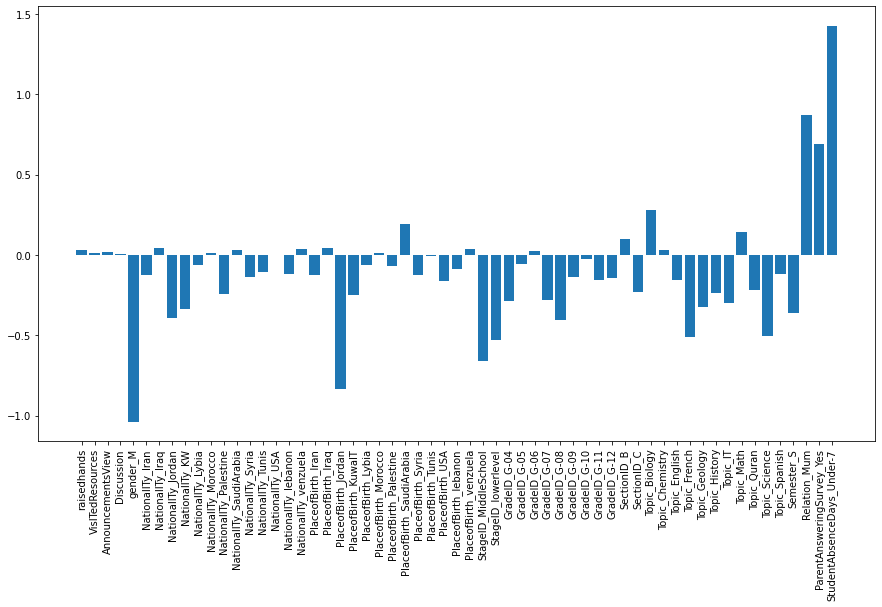

In [ ]:
# 각 변수의 기여도(모델 계수)
model_lr.classes_
print(model_lr.coef_.shape)
print(X_train.shape)

plt.figure(figsize=(15,8))
plt.bar(X_train.columns, model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

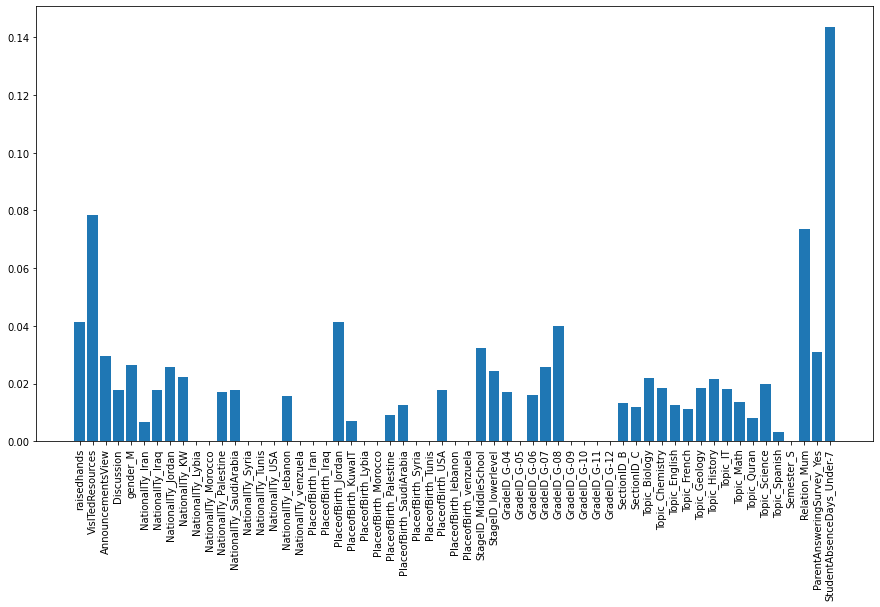

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()